<a href="https://colab.research.google.com/github/hhurchand/PythonCodesRepo/blob/master/TP2ClassificationBBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TP2 : H Hurchand

# Importer les données

In [1]:
import pandas as pd
import numpy as np
import glob             # Utilisation de glob pour télécharger des fichier multiples 

In [2]:
# Définir les noms des fichiers 
sports = ["athletics","cricket","football","rugby","tennis"]

# Définir la path pour retrouver les fichiers
subpath = "/content/drive/MyDrive/bbcsport-fulltext/bbcsport/"

# Création dans dataframe
df = pd.DataFrame(columns=["Text","Category"])


%time
n = 0
for sport in sports:
  path = subpath + sport + "/*.txt"
  for file in glob.glob(path):
    f = open(file, "r", errors='replace')
    list1 =  f.readlines()
    phrase = ""
    for i in list1:
      phrase += i
    df.loc[n,"Text"] = phrase.replace("\n"," ")
    df.loc[n,"Category"] = sport
    n += 1
    f.close()


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.53 µs


## Echantillon aléatoire du dataframe

In [3]:
df.sample(n=20)

,Text,Category
393,Benitez deflects blame from Dudek Liverpool m...,football
338,Mutu to hold talks with Juventus Disgraced fo...,football
15,Call for Kenteris to be cleared Kostas Kenter...,athletics
409,Blues slam Blackburn over Savage Birmingham h...,football
387,Bates seals takeover Ken Bates has completed ...,football
367,English clubs make Euro history All four of E...,football
710,Henman & Murray claim LTA awards Tim Henman w...,tennis
332,Edu describes tunnel fracas Arsenal's Edu has...,football
534,Moody joins up with England Lewis Moody has f...,rugby
394,McLeish ready for criticism Rangers manager A...,football


## Vérifier la présence des données manquantes

In [4]:
df.isnull().sum()

Text        0
Category    0
dtype: int64

## Tokenisation et vectorisation avec CountVectorizer 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv = CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [7]:
dtm=cv.fit_transform(df["Text"])

## Utilisation de Latent Dirichlet Allocation pour une première analyse des regroupements

In [8]:
from sklearn.decomposition import LatentDirichletAllocation

In [9]:
LDA = LatentDirichletAllocation(n_components=10,random_state=0)

In [10]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [11]:
# Cette partie du code a été pris du lien suivant
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

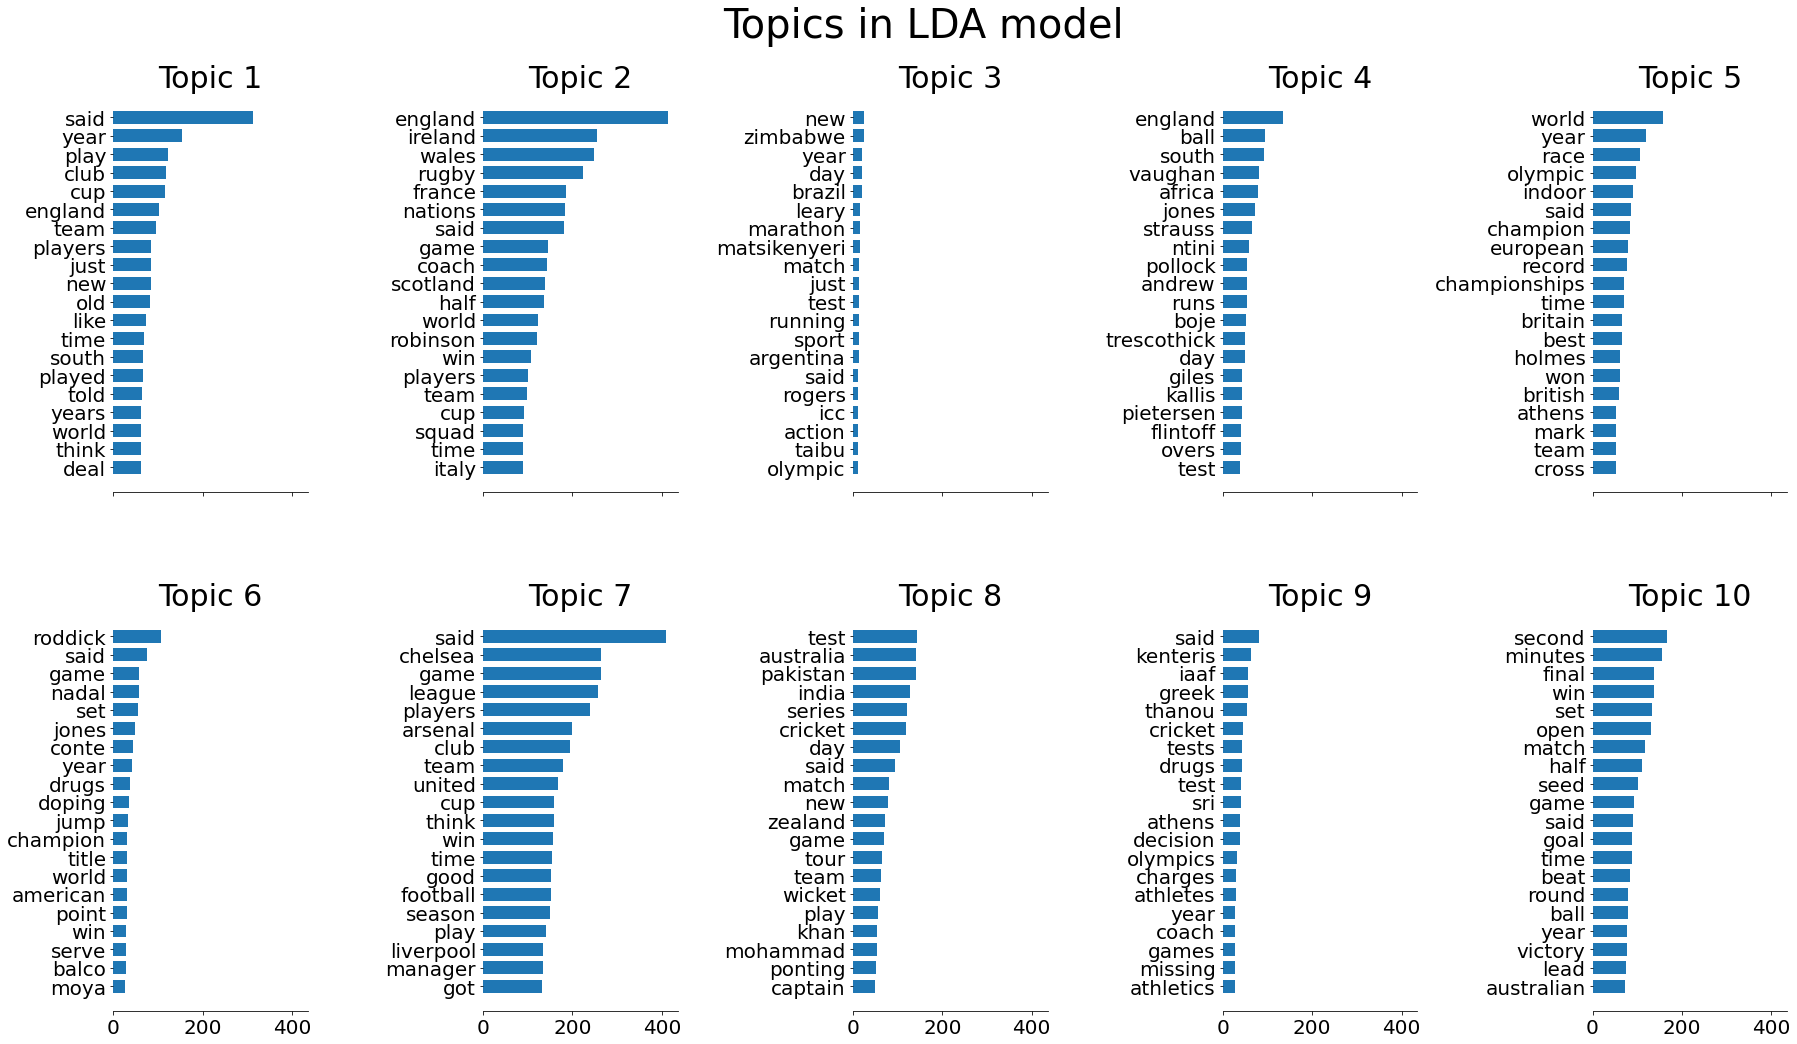

In [12]:
tf_feature_names = cv.get_feature_names()

n_top_words = 20

plot_top_words(LDA, tf_feature_names, n_top_words, 'Topics in LDA model')

In [13]:
# Identifier les vocabulaires
# Identifier les mots avec la plus grande fréquence

In [14]:
# Grab topics
LDA.components_.shape

(10, 7585)

In [15]:
#single_topic = LDA.components_[0]

In [16]:
#single_topic.argsort()

In [17]:
# Index des mots avec la plus grande fréquence
#top_words = single_topic.argsort()[-10:]

In [18]:
#for index in top_words:
#  print(cv.get_feature_names()[index]) 

In [19]:
#for index,topic in enumerate(LDA.components_):
#  print("THE TOP 50 words for TOPIC : ",topic[0])
#  print([cv.get_feature_names()[index] for index in topic.argsort()[-100:]])

## Encoder les catégories

In [20]:
df['category_id'] = df['Category'].factorize()[0]

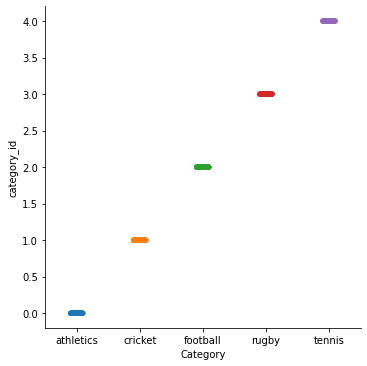

In [21]:
import seaborn as sns
sns.catplot(data=df,x='Category',y='category_id')

In [22]:
df.sample(5, random_state=0)

,Text,Category,category_id
196,"Australia complete series sweep Third Test, S...",cricket,1
187,England 'could win Ashes' Former England stal...,cricket,1
14,Kenya lift Chepkemei's suspension Kenya's ath...,athletics,0
31,Jones doping probe begins An investigation in...,athletics,0
545,Parker misses England clash Tom Shanklin will...,rugby,3


In [23]:
df_cat = pd.DataFrame(df.groupby('Category').category_id.count())
df_cat["Pourcentage"] = df_cat["category_id"].map(lambda x:x/df.shape[0]*100)
df_cat

,category_id,Pourcentage
Category,,
athletics,101,13.704206
cricket,124,16.824966
football,265,35.956581
rugby,147,19.945726
tennis,100,13.568521


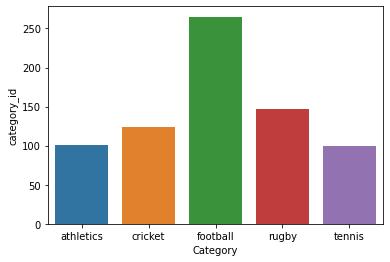

In [24]:
sns.barplot(data=df_cat,x=df_cat.index,y="category_id")

# Observation : Classes non-balancées en faveur de football
###Statégie de balancement : Undersampling pour football : Eliminer aléatoirement ~50% des données sur le football
### Justification: L'autre stratégie consisterai à ajouter des données artificielles(SMOTE - Oversampling). Ceci n'est pas considérée comme une bonne pratique, car on augmentera avec des données artificielles 80% de notre base existantes) 

In [25]:
# Liste aléatoire des enregistrements sur football  à supprimer
import random
df0 = df.copy()
football_index = [i for i in set(df0.index) if df0.loc[i,"category_id"]==2]
random.shuffle(football_index) # ceci est une méthode inplace
football = [football_index.pop() for i in range(1,130)]  # garde l'index des items qui sont enlever
df1 = df.drop(labels=football,axis=0)
df = df1.copy()
df["Category"].value_counts()


rugby        147
football     136
cricket      124
athletics    101
tennis       100
Name: Category, dtype: int64

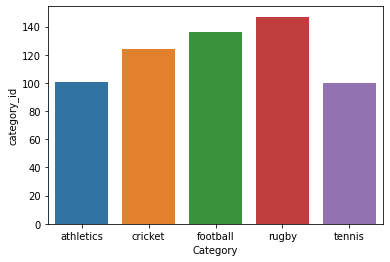

In [26]:
df_cat_new = pd.DataFrame(df.groupby('Category').category_id.count())
sns.barplot(data=df_cat_new,x=df_cat_new.index,y="category_id")

## Utilisation de TFIDF (Avec n_gram) 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray()

labels = df.category_id 

In [28]:
features.shape

(608, 4713)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Construire un pipeline pour les modeles

models = {"DT":DecisionTreeClassifier(random_state=0),
          "RFC":RandomForestClassifier(n_estimators=2000, max_depth=3, random_state=0),
          "Bayes": MultinomialNB(),
          "Logistic": LogisticRegression(random_state=0),
          "Neural Network":MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=0,max_iter=10000)}

In [34]:
nfold = 5  # Crossvalidation ( 80-20 avec 5 folds )
output = [] # Initially all entries are empty

In [36]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
for nom,model in models.items():
  t0 = time()
#  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=nfold)
##

  #Split 
  X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0,shuffle=True)

# Apprentissage
  model.fit(X_train, y_train)

# Faire predictions
  y_pred_proba = model.predict_proba(X_test)
  y_pred = model.predict(X_test)
  print("Model name\nFold\n",nom,classification_report(y_test, y_pred))
 
##
  [output.append((nom, fold_idx, accuracy,time()-t0)) for fold_idx, accuracy in enumerate(accuracies)]

Model name
Fold
 DT               precision    recall  f1-score   support

           0       0.80      0.85      0.82        33
           1       0.95      0.95      0.95        37
           2       0.77      0.77      0.77        47
           3       0.98      0.89      0.94        57
           4       0.83      0.93      0.88        27

    accuracy                           0.87       201
   macro avg       0.87      0.88      0.87       201
weighted avg       0.87      0.87      0.87       201

Model name
Fold
 RFC               precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       1.00      0.95      0.97        37
           2       0.94      0.98      0.96        47
           3       0.96      0.96      0.96        57
           4       1.00      1.00      1.00        27

    accuracy                           0.97       201
   macro avg       0.97      0.97      0.97       201
weighted avg       0.97      0.97   

In [37]:
df_x_v = pd.DataFrame(output, columns=['Modele', 'fold_idx', 'accuracy',"time(secondes)"])

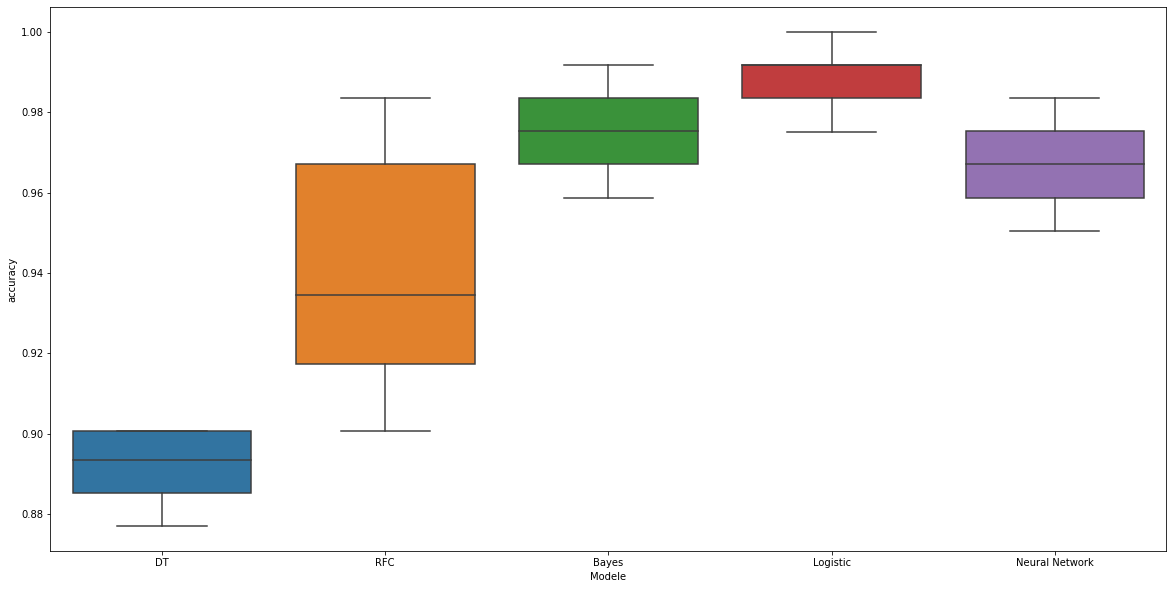

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.boxplot(x='Modele', y='accuracy', data=df_x_v,orient="v")


In [39]:
df_moyenne = df_x_v.groupby(['Modele']).mean()
df_moyenne

,fold_idx,accuracy,time(secondes)
Modele,,,
Bayes,2,0.975315,0.118543
DT,2,0.891478,0.787711
Logistic,2,0.988457,5.029762
Neural Network,2,0.967064,11.088673
RFC,2,0.940686,25.164738


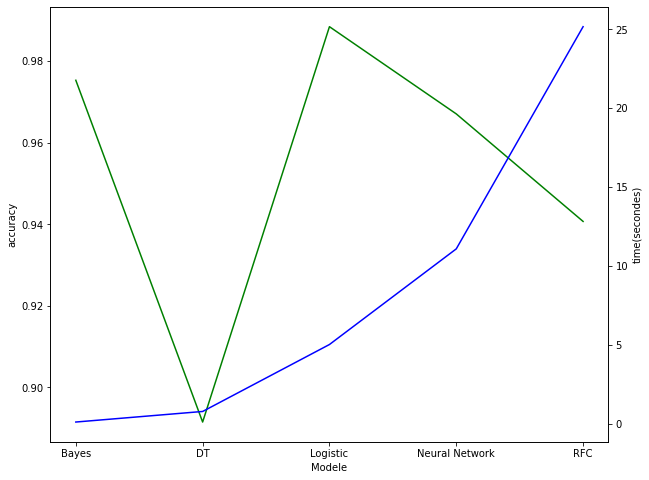

In [43]:

plt.figure(figsize=(10,8))
sns.lineplot(data=df_moyenne.accuracy, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_moyenne["time(secondes)"],color="b", ax=ax2)

In [44]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0,shuffle=True)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Matrice de confusion pour Regression Logistique')

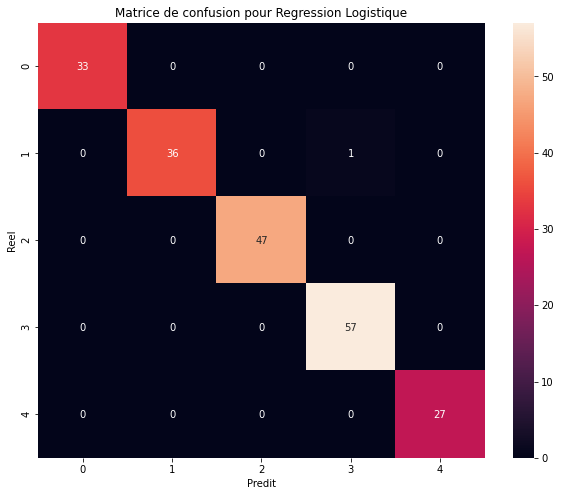

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

plt.figure(figsize=(10,8))

matr = confusion_matrix(y_test, y_pred)
sns.heatmap(matr, annot=True)

plt.ylabel('Reel')
plt.xlabel('Predit')
plt.title("Matrice de confusion pour Regression Logistique")


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.99        37
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        57
           4       1.00      1.00      1.00        27

    accuracy                           1.00       201
   macro avg       1.00      0.99      1.00       201
weighted avg       1.00      1.00      1.00       201

